# Tijay's Python Bootcamp

In [1]:
# We'll use this code block for imports
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Basic File read/write

In [2]:
# Python textbook read file & print each line
f = open("test.txt", "r")  # /Users/tijay/Documents/test.txt or whatever
for line in f:
    print(line)
f.close()

This is a demo text file.

I am the second line.

This is not the second line.

Here is another line.

Ok, we're at the end of the file now.


In [3]:
# This is the recommended way
with open("test.txt", "r") as f:
    for line in f:
        print(line)

This is a demo text file.

I am the second line.

This is not the second line.

Here is another line.

Ok, we're at the end of the file now.


In [4]:
# This is how you create a file and write to it immediately.
with open("new.txt", "w") as f:
    f.write("This is an example of a new file.")

In [5]:
# Create only, no write
try:
    with open("new2.txt", "x") as f:
        print("File {} created.".format(f.name))
except FileExistsError:
    print("File not created. Already exists.")

File new2.txt created.


## Using the CSV Module

In [9]:
# reading the CSV as a list of lists
with open("crime.csv") as cf:
    reader = csv.reader(cf, delimiter=',')
    i = 0
    for row in reader:
        if i == 0:
            print(f'Column names are: {", ".join(row)}')
            # print("Column names are: {}".format(", ".join(row)))
            i += 1
        else:
            print(f'A crime called {row[5]} happened at {row[1]}')

 CUNNINGHAM WAY
A crime called 10851(A)VC TAKE VEH W/O OWNER happened at 38TH ST / 22ND AVE
A crime called 484 PETTY THEFT/LICENSE PLATE happened at 8000 FOLSOM BLVD
A crime called 459 PC  BURGLARY RESIDENCE happened at 2517 T ST
A crime called 10851(A)VC TAKE VEH W/O OWNER happened at 2517 T ST
A crime called 459 PC  BURGLARY VEHICLE happened at 610 14TH ST
A crime called 211 PC  ROBBERY UNSPECIFIED happened at 2300 R ST
A crime called 212.5(A)ROBBERY-INHAB DWELLING happened at 5209 62ND ST
A crime called MISCELLANEOUS I RPT (ZMISC) happened at 5425 FRUITRIDGE RD
A crime called 459 PC  BURGLARY RESIDENCE happened at 2717 D ST
A crime called 484 PC PETTY THEFT happened at 3439 1ST AVE
A crime called 594(B)(1)PC  VANDALISM +$400 happened at 2631 CADJEW AVE
A crime called 10851(A)VC TAKE VEH W/O OWNER happened at 119 CEDAR ROCK CIR
A crime called 10851(A)VC TAKE VEH W/O OWNER happened at 119 CEDAR ROCK CIR
A crime called LOST PROPERTY - I RPT happened at J ST / 30TH ST
A crime called 108

In [10]:
# reading the CSV as a Dictionary
with open("crime.csv") as cf:
    reader = csv.DictReader(cf)
    i = 0
    for row in reader:
        if i == 0:
            print(f'Column names are: {", ".join(row)}')
            # print("Column names are: {}".format(", ".join(row)))
            i += 1
        else:
            print(f'A crime called {row["crimedescr"]} happened at {row["address"]}')

 CUNNINGHAM WAY
A crime called 10851(A)VC TAKE VEH W/O OWNER happened at 38TH ST / 22ND AVE
A crime called 484 PETTY THEFT/LICENSE PLATE happened at 8000 FOLSOM BLVD
A crime called 459 PC  BURGLARY RESIDENCE happened at 2517 T ST
A crime called 10851(A)VC TAKE VEH W/O OWNER happened at 2517 T ST
A crime called 459 PC  BURGLARY VEHICLE happened at 610 14TH ST
A crime called 211 PC  ROBBERY UNSPECIFIED happened at 2300 R ST
A crime called 212.5(A)ROBBERY-INHAB DWELLING happened at 5209 62ND ST
A crime called MISCELLANEOUS I RPT (ZMISC) happened at 5425 FRUITRIDGE RD
A crime called 459 PC  BURGLARY RESIDENCE happened at 2717 D ST
A crime called 484 PC PETTY THEFT happened at 3439 1ST AVE
A crime called 594(B)(1)PC  VANDALISM +$400 happened at 2631 CADJEW AVE
A crime called 10851(A)VC TAKE VEH W/O OWNER happened at 119 CEDAR ROCK CIR
A crime called 10851(A)VC TAKE VEH W/O OWNER happened at 119 CEDAR ROCK CIR
A crime called LOST PROPERTY - I RPT happened at J ST / 30TH ST
A crime called 108

In [11]:
# Writing a CSV with the csv module
contents = [
    ['name', 'age', 'city'],
    ['Justin', 35, 'Santa Fe'],
    ['Bob', 67, 'Boston'],
]

with open("new.csv", 'w') as cf:
    writer = csv.writer(cf)
    for row in contents:
        writer.writerow(row)

## Using numpy

In [14]:
record = np.genfromtxt("new.csv", delimiter=',', encoding="utf8", dtype=None)
print(record)

[['name' 'age' 'city']
 ['Justin' '35' 'Santa Fe']
 ['Bob' '67' 'Boston']]


## Using pandas
### Working with CSV

In [18]:
# load CSV to a DataFrame
df = pd.read_csv("new.csv")
print(df)

name  age      city
0  Justin   35  Santa Fe
1     Bob   67    Boston


In [24]:
# Load only a subset of columns
df = pd.read_csv("crime.csv", usecols=['address', 'crimedescr'], nrows=10)
print(df)

address                     crimedescr
0   3108 OCCIDENTAL DR  10851(A)VC TAKE VEH W/O OWNER
1  2082 EXPEDITION WAY     459 PC  BURGLARY RESIDENCE
2           4 PALEN CT  10851(A)VC TAKE VEH W/O OWNER
3       22 BECKFORD CT   476 PC PASS FICTICIOUS CHECK
4     3421 AUBURN BLVD   459 PC  BURGLARY-UNSPECIFIED
5   5301 BONNIEMAE WAY  530.5 PC USE PERSONAL ID INFO
6        2217 16TH AVE       459 PC  BURGLARY VEHICLE
7            3547 P ST    484 PC   PETTY THEFT/INSIDE
8     3421 AUBURN BLVD      459 PC  BURGLARY BUSINESS
9    1326 HELMSMAN WAY        1708 US   THEFT OF MAIL


In [20]:
# writing to a CSV
df.to_csv('pandas.csv')

### Working with Excel

In [34]:
# This pulls in only Sheet 1
df = pd.read_excel("movies.xls", usecols=['Title', 'Year', 'Duration'], index_col=0)
# print(df)

In [35]:
# Joining multiple sheets to one dataframe
df2 = pd.read_excel("movies.xls", usecols=['Title', 'Year', 'Duration'], sheet_name=1, index_col=0)
df3 = pd.read_excel("movies.xls", usecols=['Title', 'Year', 'Duration'], sheet_name=2, index_col=0)

movies = pd.concat([df, df2, df3])
# print(movies)

## Plotting with matplotlib

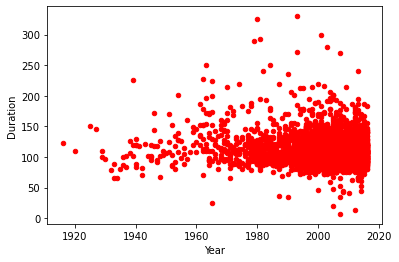

In [37]:
movies.plot(kind='scatter', y='Duration', x='Year', color='red')
plt.show()  # plt.savefig('filename.png')

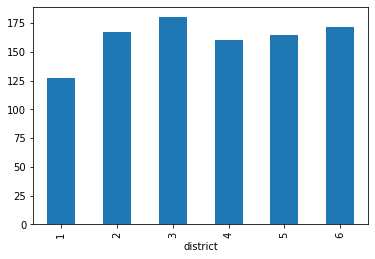

In [41]:
crime = pd.read_csv("crime.csv")
crime.groupby('district')['crimedescr'].nunique().plot(kind='bar')
plt.show()

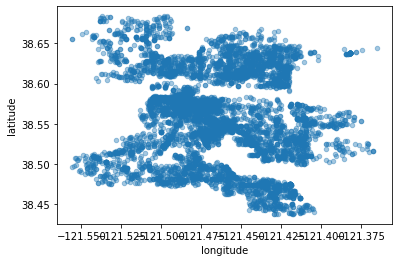

In [42]:
# Geoplotting on an image
# import matplotlib.image as mpimg
# sac_map = mpimg.imread('sacramento.png')
crime.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4)
plt.show()  # plt.imshow(sac_map)